# IK of the delta robot using analytical solution:

### ---------USING THE ANAYTICAL METHODS-------------

Equation we'll be using is:
$(E_i)cos(\theta)+(F_i)sin(\theta)+Gi=0$

Solved using something known as the "tangent half angle substitution"

 Constants will be:
 1. wp
 2. up
 3. wb
 4. ub
 5. l
 6  sp
 7. sb


In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt


We can see that only the 2's are positive! (out kinked)

In [4]:
import pandas as pd

# inverse_results_table=pd.DataFrame(
#     {
#         'X':x,
#         'Y': y,
#         'Z': z,
#         'Theta1_1': theta1_1,
#         'Theta1_2': theta1_2,
#         'Theta2_1': theta2_1,
#         'Theta2_2': theta2_2,
#         'Theta3_1': theta3_1,
#         'Theta3_2': theta3_2,
#         'Delta1': delta1,
#         'Delta2': delta2,
#         'Delta3': delta3

#     }#,columns=['x','y','z','Knee in for theta_1', 'Knee out for theta_1', 'Knee in for theta_2', 'Knee out for theta_2','Knee in for theta_3', 'Knee out for theta_3']
# )

In [32]:
def ik_sol(x,y,z,L,l,sp,sb):

    #getting some of the constants:
    wb= (np.sqrt(3)/6)*sb
    wp=(np.sqrt(3)/6)*sp

    ub=(np.sqrt(3)/3)*sb
    up=(np.sqrt(3)/3)*sp

    a=a=wb-up
    b=(sp/2)-((np.sqrt(3)/2)*wb)
    c=wp-(wb/2)
    if (hasattr(x,"__len__") and hasattr(y, "__len__") and hasattr(z, "__len__")):
        #shuffling them:
        np.random.shuffle(x)
        np.random.shuffle(y)
        np.random.shuffle(z)

        #initiating some of the other variables we'll be using:
        E1=np.zeros_like(y)
        F1=np.zeros_like(z)
        G1=np.zeros_like(y**2)
        E2=np.zeros_like(y)
        F2=np.zeros_like(z)
        G2=np.zeros_like(y**2)
        E3=np.zeros_like(y)
        F3=np.zeros_like(z)
        G3=np.zeros_like(y**2)

        t1_1=np.zeros_like(z)
        t1_2=np.zeros_like(z)
        t2_1=np.zeros_like(z)
        t2_2=np.zeros_like(z)
        t3_1=np.zeros_like(z)
        t3_2=np.zeros_like(z)

        theta1_1=np.zeros_like(z)
        theta1_2=np.zeros_like(z)
        theta2_1=np.zeros_like(z)
        theta2_2=np.zeros_like(z)
        theta3_1=np.zeros_like(z)
        theta3_2=np.zeros_like(z)

        #to make sure that it only returns the required theta's, and hence their corresponding x,y and z:
        t1_fin=[]
        
        np.array(t1_fin)


        
        for i in range(len(x)):
            #IK equations:
            #--1---
            E1[i]=2*L*(y[i]+a)
            F1[i]=2*z[i]*L
            G1[i]=(x[i]**2 + y[i]**2 + z[i]**2 + a**2 + L**2 + 2*y[i]*a - l**2)

            #--2--
            E2[i]=-L*(np.sqrt(3)*(x[i]+b) + y[i] + c)
            F2[i]=2*z[i]*L
            G2[i]=x[i]**2 + y[i]**2 + z[i]**2 + a**2 + L**2 +2*(x[i]*b + y[i]*c) - l**2

            #--3--
            E3[i]=L*(np.sqrt(3)*(x[i]-b) - y[i] - c)
            F3[i]=2*z[i]*L
            G3[i]=x[i]**2 + y[i]**2 + z[i]**2 + a**2 + L**2 +2*(-x[i]*b + y[i]*c) - l**2

            if ((E1[i]**2 + F1[i]**2 -G1[i]**2)<0) or ((E2[i]**2 + F2[i]**2 -G2[i]**2)<0) or ((E3[i]**2 + F3[i]**2 -G3[i]**2)<0):
                # del t1_1[i], t1_2[i], t2_1[i], t2_2[i], t3_1[i], t3_2[i], theta1_1[i],theta1_2[i], theta2_1[i], theta2_2[i], theta3_1[i], theta3_2[i]
                pass 
                
            else:
                #---SOLVING THE QUADRATIC FORMULA----
                t1_1[i]=((-F1[i])+np.sqrt(np.abs(E1[i]**2 + F1[i]**2 -G1[i]**2)))/(G1[i] - E1[i])
                t1_2[i]=((-F1[i])-np.sqrt(np.abs(E1[i]**2 + F1[i]**2 -G1[i]**2)))/(G1[i] - E1[i])

                t2_1[i]=((-F2[i])+np.sqrt(np.abs(E2[i]**2 + F2[i]**2 -G2[i]**2)))/(G2[i] - E2[i])
                t2_2[i]=((-F2[i])-np.sqrt(np.abs(E2[i]**2 + F2[i]**2 -G2[i]**2)))/(G2[i] - E2[i])

                t3_1[i]=((-F3[i])+np.sqrt(np.abs(E3[i]**2 + F3[i]**2 -G3[i]**2)))/(G3[i] - E3[i])
                t3_2[i]=((-F3[i])-np.sqrt(np.abs(E3[i]**2 + F3[i]**2 -G3[i]**2)))/(G3[i] - E3[i])

                #--FINDING THE THETA VALUES--
                theta1_1[i]=(2*np.arctan(t1_1[i]))*57.2958
                theta1_2[i]=(2*np.arctan(t1_2[i]))*57.2958
                theta2_1[i]=(2*np.arctan(t2_1[i]))*57.2958
                theta2_2[i]=(2*np.arctan(t2_2[i]))*57.2958
                theta3_1[i]=(2*np.arctan(t3_1[i]))*57.2958
                theta3_2[i]=(2*np.arctan(t3_2[i]))*57.2958
                theta_all=[theta1_1,theta1_2, theta2_1, theta2_2, theta3_1, theta3_2]


    else:
        #IK equations:
        #--1---
        E1=2*L*(y+a)
        F1=2*z*L
        G1=(x**2 + y**2 + z**2 + a**2 + L**2 + 2*y*a - l**2)

        #--2--
        E2=-L*(np.sqrt(3)*(x+b) + y + c)
        F2=2*z*L
        G2=x**2 + y**2 + z**2 + a**2 + L**2 +2*(x*b + y*c) - l**2

        #--3--
        E3=L*(np.sqrt(3)*(x-b) - y - c)
        F3=2*z*L
        G3=x**2 + y**2 + z**2 + a**2 + L**2 +2*(-x*b + y*c) - l**2
        
        if (E1**2 + F1**2 -G1**2<0) or (E2**2 + F2**2 -G2**2<0) or (E3**2 + F3**2 -G3**2<0):
            print('Not a valid point in the workspace of the delta robot')

        #---SOLVING THE QUADRATIC FORMULA----
        t1_1=((-F1)+np.sqrt(np.abs(E1**2 + F1**2 -G1**2)))/(G1 - E1)
        t1_2=((-F1)-np.sqrt(np.abs(E1**2 + F1**2 -G1**2)))/(G1 - E1)

        t2_1=((-F2)+np.sqrt(np.abs(E2**2 + F2**2 -G2**2)))/(G2 - E2)
        t2_2=((-F2)-np.sqrt(np.abs(E2**2 + F2**2 -G2**2)))/(G2 - E2)

        t3_1=((-F3)+np.sqrt(np.abs(E3**2 + F3**2 -G3**2)))/(G3 - E3)
        t3_2=((-F3)-np.sqrt(np.abs(E3**2 + F3**2 -G3**2)))/(G3 - E3)

        #--FINDING THE THETA VALUES--
        theta1_1=(2*np.arctan(t1_1))*57.2958
        theta1_2=(2*np.arctan(t1_2))*57.2958
        theta2_1=(2*np.arctan(t2_1))*57.2958
        theta2_2=(2*np.arctan(t2_2))*57.2958
        theta3_1=(2*np.arctan(t3_1))*57.2958
        theta3_2=(2*np.arctan(t3_2))*57.2958
        

    return theta1_1, theta1_2, theta2_1, theta2_2, theta3_1, theta3_2
    

## Random Testing:

In [20]:
x=np.arange(-2,2,0.05)
y=np.arange(-2,2,0.05)
z=np.arange(-2,2,0.05)

ik_sol(x,y,z, 0.524, 1.244, 0.076, 0.567)

(array([   0.        ,  171.40610002,    0.        , -159.20518164,
           0.        ,    0.        ,    0.        ,  118.2077296 ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        , -100.65881241,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  -13.04202903,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         137.46753489, -155.00795746,    0.        ,    0.        ,
           0.        ,    0.        ,    0.     

In [22]:
ik_sol(0,0,-0.9, 0.524, 1.244, 0.076, 0.567)

(-144.2884847989684,
 -20.547285495754668,
 -144.2884847989684,
 -20.547285495754668,
 -144.2884847989684,
 -20.547285495754668)

In [24]:
ik_sol(0.3, 0.5, -1.1, 0.524, 1.244, 0.076, 0.567)

(-168.70553381982972,
 47.504069994536806,
 152.52445334064,
 -11.568552024443662,
 172.06149161959,
 21.37839396404589)

Text(0.5, 0, 't')

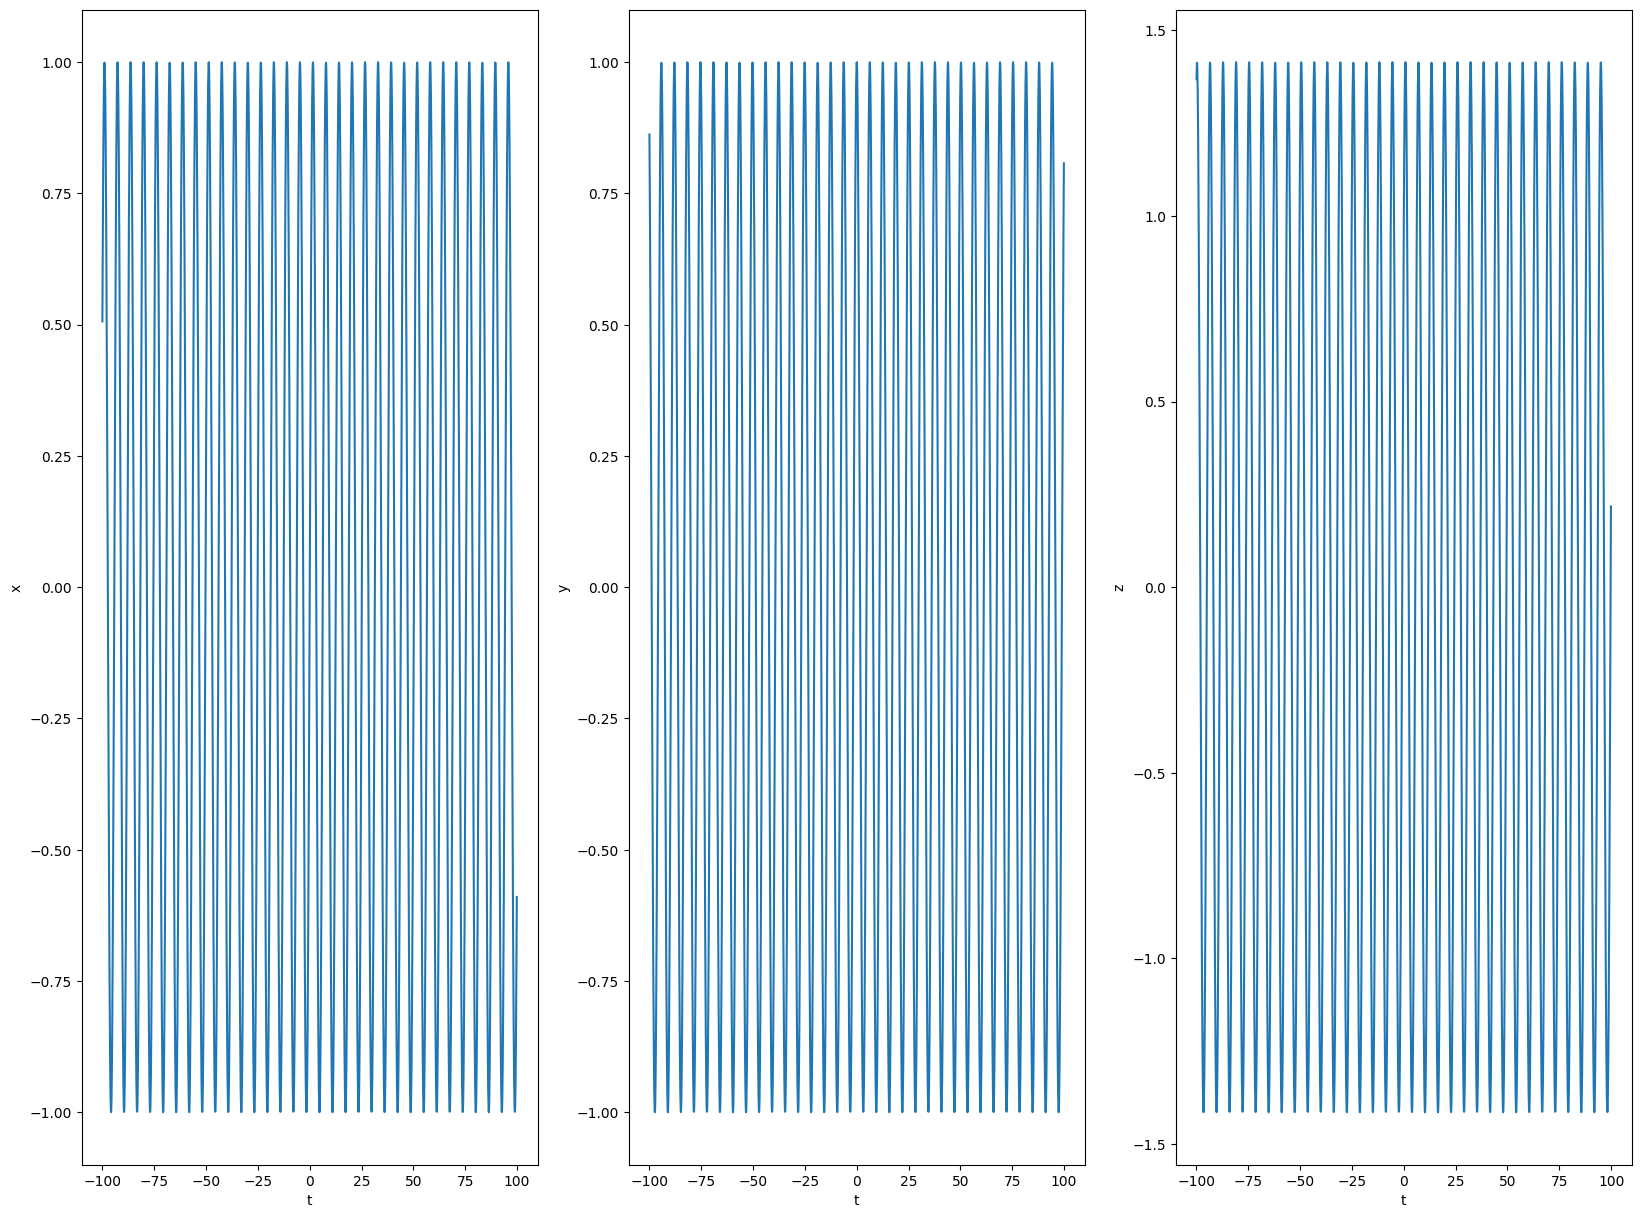

In [25]:
# def plot_ik(x,y,z,L,l,sp,sb):
#     print("---THESE ARE THE IK SOLUTIONS---")
#     ik_sol(x,y,z,L,l,sp,sb)
    
#     print("----We will only consider the ones under 90 degrees----")
#     for i in ik_sol(x,y,z,L,l,sp,sb):
#         if

t=np.arange(-100,100,0.1)

x=np.sin(t)
y=np.cos(t)
z=np.sin(t)+np.cos(t)

plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
plt.plot(t,x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(1,3,2)
plt.plot(t,y)
plt.ylabel('y')
plt.xlabel('t')

plt.subplot(1,3,3)
plt.ylabel('z')
plt.plot(t,z)
plt.xlabel('t')



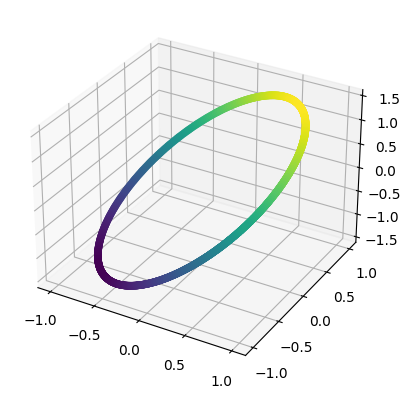

In [10]:
plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=z, cmap='viridis')


In [29]:
ik_sol(x,y,z, 0.524, 1.244, 0.076, 0.567)

(array([  47.37308317, -162.85270769,    0.        , ...,  -33.62410587,
        -153.41701177,    0.        ]),
 array([-107.74143647,   77.80174492,    0.        , ..., -162.73483751,
          35.54136332,    0.        ]),
 array([-99.65143256, 145.58373297,   0.        , ..., -67.90619209,
        167.76284308,   0.        ]),
 array([140.38757672,  21.51134114,   0.        , ..., 165.9413675 ,
        -25.86118207,   0.        ]),
 array([ -37.61234676,  131.12224892,    0.        , ...,   20.58025914,
        -172.46453592,    0.        ]),
 array([-118.9980353 ,  -12.68059407,    0.        , ..., -134.83827848,
           5.12276376,    0.        ]))

## Golden Section method:

In [30]:
# def cal_f(_x):  # 4x - 1.8x^2 + 1.2x^3 - 0.3x^4
#     return 4 * _x - 1.8 * _x ** 2 + 1.2 * _x ** 3 - 0.3 * _x ** 4


# def cal_d(_xu, _xl):
#     return R * (_xu - _xl)


# def check_e(_xu, _xl, _xopt, _e):
#     _ea = (1 - R) * abs((_xu - _xl) / _xopt)
#     print("Ea = {} %".format(_ea*100))
#     if _ea < _e:
#         return 1
#     return 0


# def search(_xu, _xl, _e, _n):
#     _x = [0, 0]
#     _f = [0, 0]
#     _result = 0
#     for i in range(0, _n):
#         _d = cal_d(_xu, _xl)
#         _x[0] = _xl + _d
#         _x[1] = _xu - _d
#         _f[0] = cal_f(_x[0])
#         _f[1] = cal_f(_x[1])
#         if _f[0] > _f[1]:
#             _xl = _x[1]
#             _result = _x[0]
#             if check_e(_xu, _xl, _x[0], _e):
#                 break
#         else:
#             _xu = _x[0]
#             _result = _x[1]
#             if check_e(_xu, _xl, _x[1], _e):
#                 break
#         if i % 1 == 0:
#             print("Iteration {}: xL = {}\t xU = {}\t x1 = {}\t fx1 = {}\t x2 = {}\t fx2 = {}\t d = {}\t"
#                   .format(i, round(_xl, 5), round(_xu, 5), round(_x[0], 5), round(_f[0], 5), round(_x[1], 5),
#                           round(_f[1], 5), round(_d, 5)))
#     return _result


# R = (math.sqrt(5) - 1) * 0.5
# xU = 4
# xL = 2
# eS = 1 / 100
# n = 100
# result = search(xU, xL, eS, n)
# print("x = {}, fx = {}".format(result, cal_f(result)))

### Golden Section using scipy:

In [ ]:
import scipy.optimize as sco

# minimum=sco.golden(ik_sol(x,y,z, 0.524, 1.244, 0.076, 0.567), brack=(-15,15))
